In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler


In [ ]:
#----------------------------------------------------------CLASSIFICATION USING KNN------------------------------------------------------
#--------------------------ABOUT DATASET------------------

#shape 43957, 15

#columns ->'age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income_>50K'

#missing values->workclass,occupation,native-country

#remove missing values using->mode

#dataset is imbalanced ->using oversampling balance the dataset

#for normalize->Min-Max Normalize



#--------------------------from EDA-----------------------
#People maximunm working in private sector

#From self emp-Income most of the people earn more than 50k

#Most of the people educated Hs-grad or some college

#If people done Doctorate or Masters maximum of people earn more than 50k



#--------------------------feature selection----------------
#using correlation heatmap ->include all the columns


#--------------------------Model KNN--------------------
#using sklearn
          #Accuracy: 0.9030
          #Precision: 0.8663
          #Recall: 0.9525
          #AUC-ROC Score: 0.9031
#without using sklearn
          #Accuracy: 0.9031
          #Precision: 0.907
          #Recall: 0.90315
          #F1-score: 0.90285

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/week2_python/income.csv')

In [ ]:
df.shape

(43957, 15)

In [ ]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country  income_>50K  
0              60  United-States            1  
1              15  United-States            0  
2              40  United-States            1  
3              40  United-States            0  
4              40  United-States            0

In [ ]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

<Axes: >

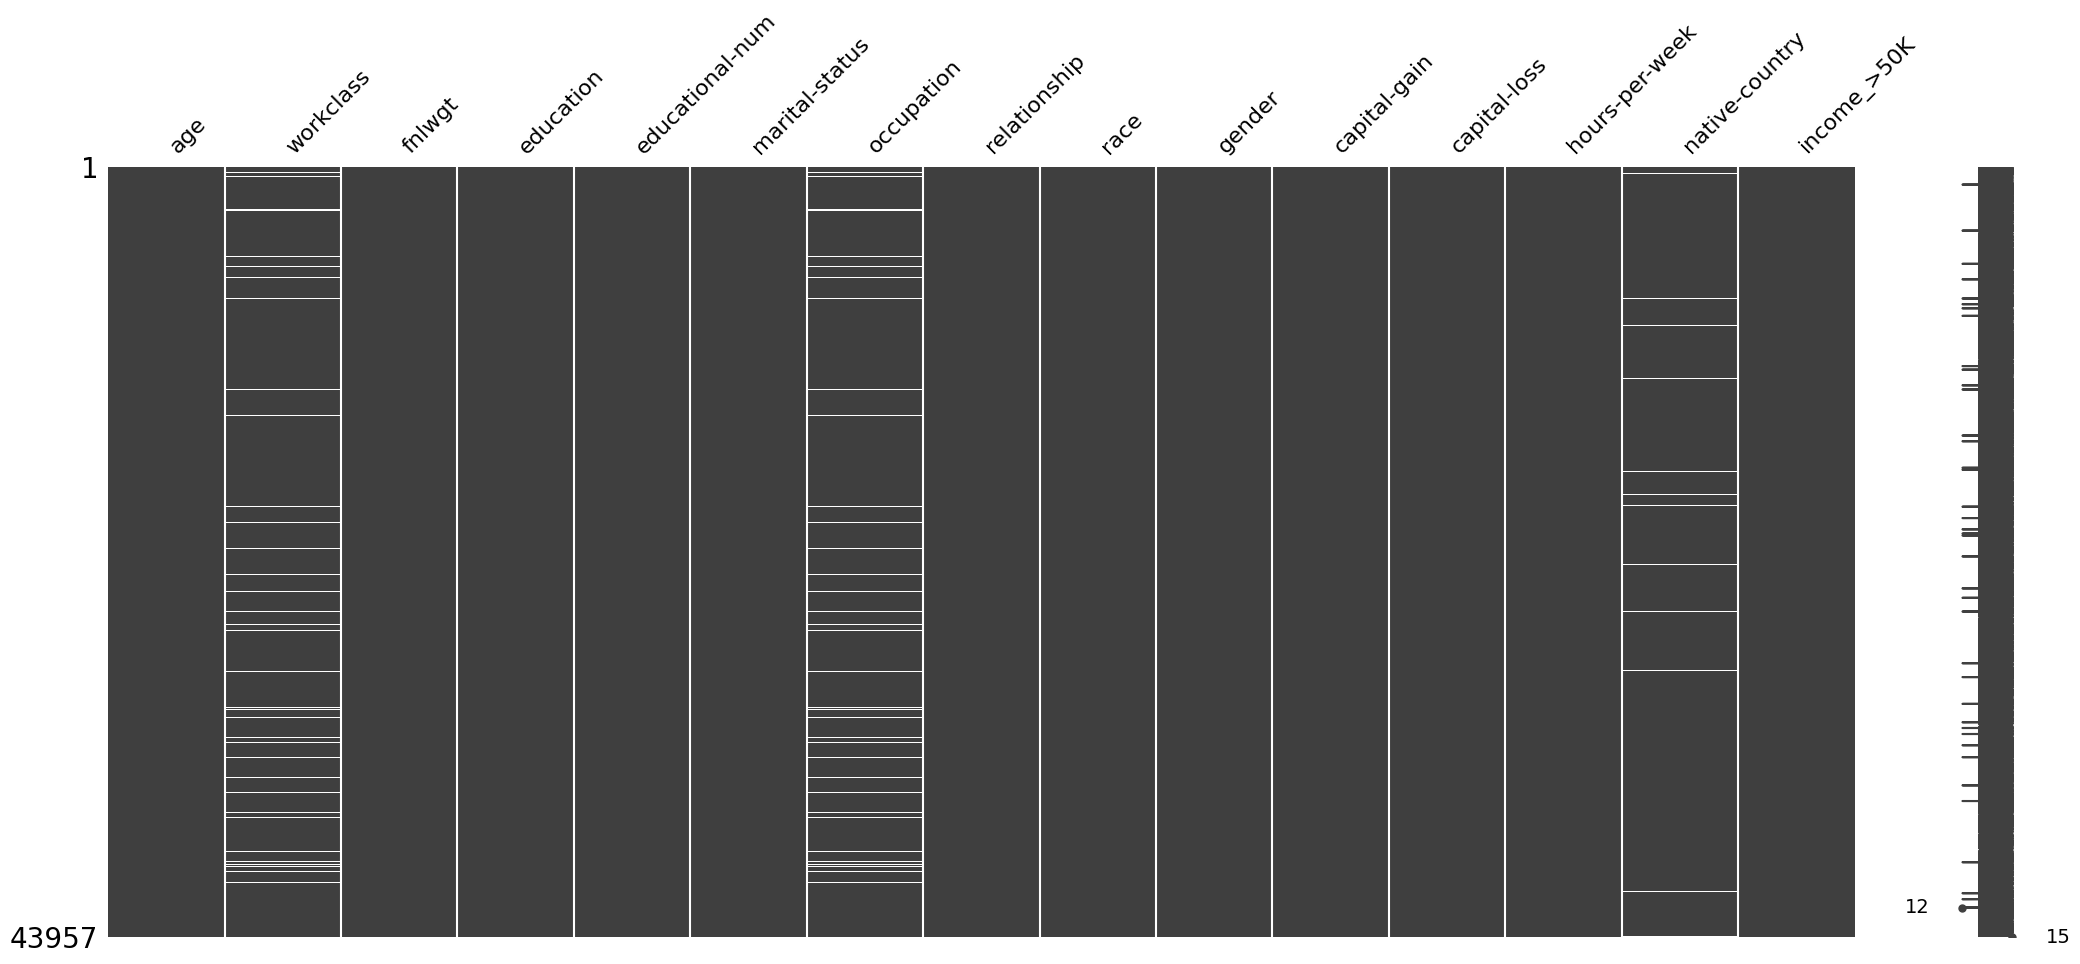

In [ ]:
msno.matrix(df)

In [ ]:
categorical_features = []
categorical_features = df.select_dtypes(include=['object']).copy()
categorical_features.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [ ]:
for col in list(categorical_features.columns):
    print(col +' has '+ str(categorical_features[col].nunique()) +' unique elements, which are :\n ' + str(categorical_features[col].unique()))
    print('\n')
    print(round(df[col].value_counts(normalize=True)*100,2).map(str)+'%')
    print('\n')

workclass has 8 unique elements, which are :
 ['Private' 'State-gov' 'Self-emp-not-inc' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' nan 'Never-worked' 'Without-pay']


Private             73.78%
Self-emp-not-inc     8.36%
Local-gov            6.81%
State-gov            4.24%
Self-emp-inc         3.66%
Federal-gov           3.1%
Without-pay          0.05%
Never-worked         0.02%
Name: workclass, dtype: object


education has 16 unique elements, which are :
 ['Doctorate' '12th' 'Bachelors' '7th-8th' 'Some-college' 'HS-grad' '9th'
 '10th' '11th' 'Masters' 'Preschool' '5th-6th' 'Prof-school' 'Assoc-voc'
 '1st-4th' 'Assoc-acdm']


HS-grad          32.3%
Some-college    22.27%
Bachelors       16.42%
Masters          5.44%
Assoc-voc        4.17%
11th             3.75%
Assoc-acdm       3.29%
10th             2.84%
7th-8th          1.96%
Prof-school       1.7%
9th              1.56%
12th             1.34%
Doctorate        1.22%
5th-6th          1.06%
1st-4th          0.51%
Preschool        0.1

In [ ]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [ ]:
# Fill missing values with the most frequent value in the respective columns
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [ ]:
column=[]
column =(pd.concat([categorical_features, df['income_>50K']], axis=1))
column.loc[column['income_>50K']==0, ['income_>50K']] ='No'
column.loc[column['income_>50K']==1, ['income_>50K']] ='Yes'
column.head()

workclass     education      marital-status        occupation  \
0    Private     Doctorate            Divorced   Exec-managerial   
1    Private          12th       Never-married     Other-service   
2    Private     Bachelors  Married-civ-spouse   Exec-managerial   
3  State-gov       7th-8th  Married-civ-spouse  Transport-moving   
4  State-gov  Some-college       Never-married     Other-service   

    relationship   race gender native-country income_>50K  
0  Not-in-family  White   Male  United-States         Yes  
1      Own-child  White   Male  United-States          No  
2        Husband  White   Male  United-States         Yes  
3        Husband  White   Male  United-States          No  
4  Not-in-family  Black   Male  United-States          No

In [ ]:
for col in column.columns:
    x=column.groupby([col,'income_>50K'])['income_>50K'].count()
    y= column.groupby([col])['income_>50K'].count()
    r = round((x/y)*100,2).map(str)+'%'
    print(r)

workclass         income_>50K
Federal-gov       No             60.51%
                  Yes            39.49%
Local-gov         No             69.95%
                  Yes            30.05%
Never-worked      No             100.0%
Private           No             78.29%
                  Yes            21.71%
Self-emp-inc      No             43.81%
                  Yes            56.19%
Self-emp-not-inc  No             72.34%
                  Yes            27.66%
State-gov         No             73.06%
                  Yes            26.94%
Without-pay       No              90.0%
                  Yes             10.0%
Name: income_>50K, dtype: object
education     income_>50K
10th          No             93.44%
              Yes             6.56%
11th          No              94.9%
              Yes              5.1%
12th          No              92.5%
              Yes              7.5%
1st-4th       No             96.86%
              Yes             3.14%
5th-6th       No       

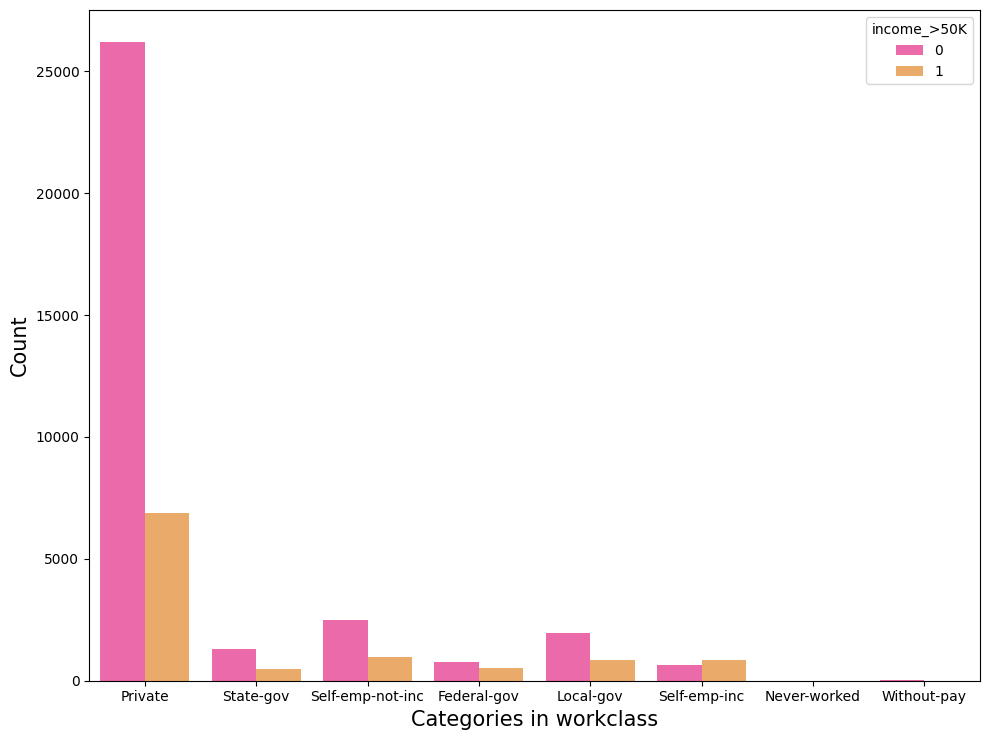

In [ ]:
ax= sns.countplot(x='workclass', hue='income_>50K', palette='spring',data=df)
plt.rcParams["figure.figsize"] = [15.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

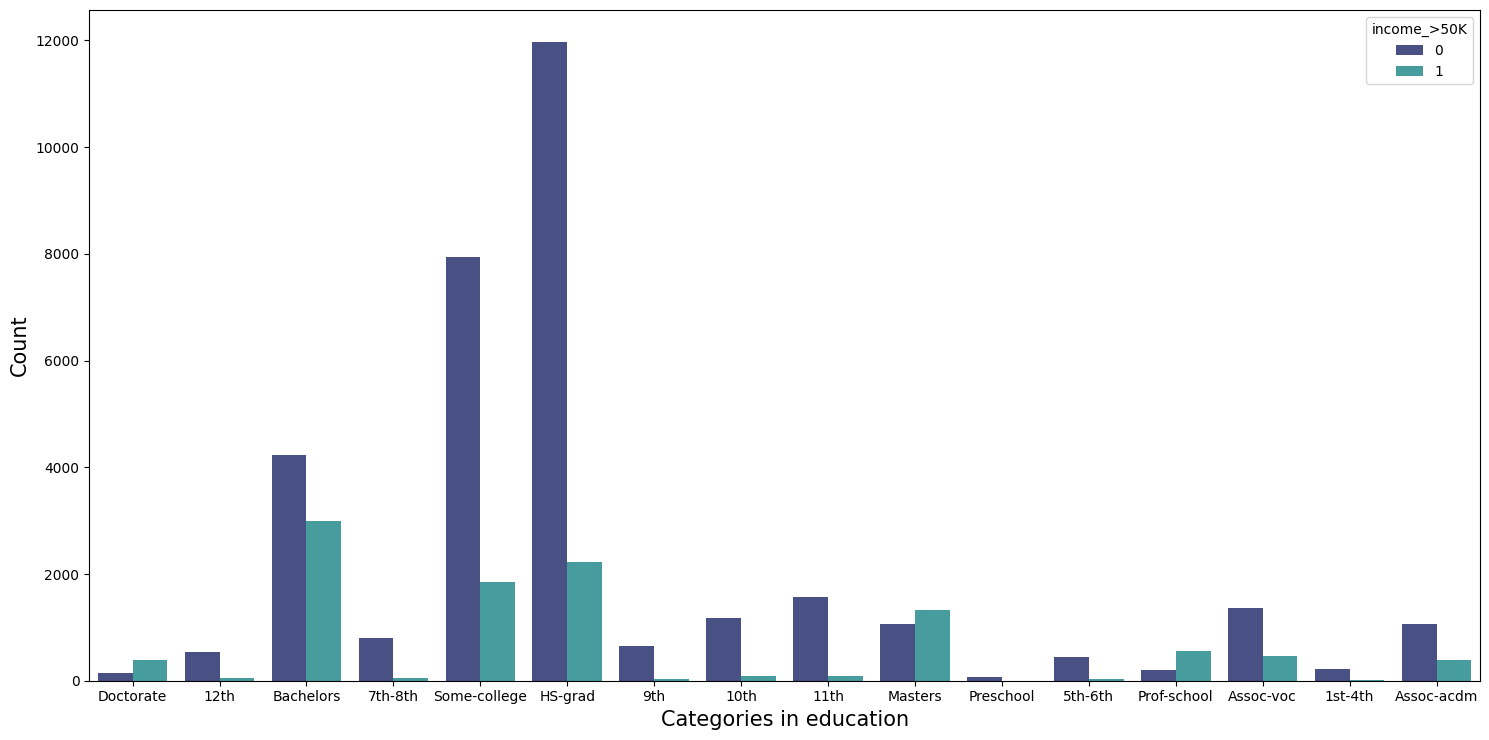

In [ ]:
sns.countplot(data=df,x='education', hue='income_>50K',palette='mako')
plt.rcParams["figure.figsize"] = [15.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in education", size=15);

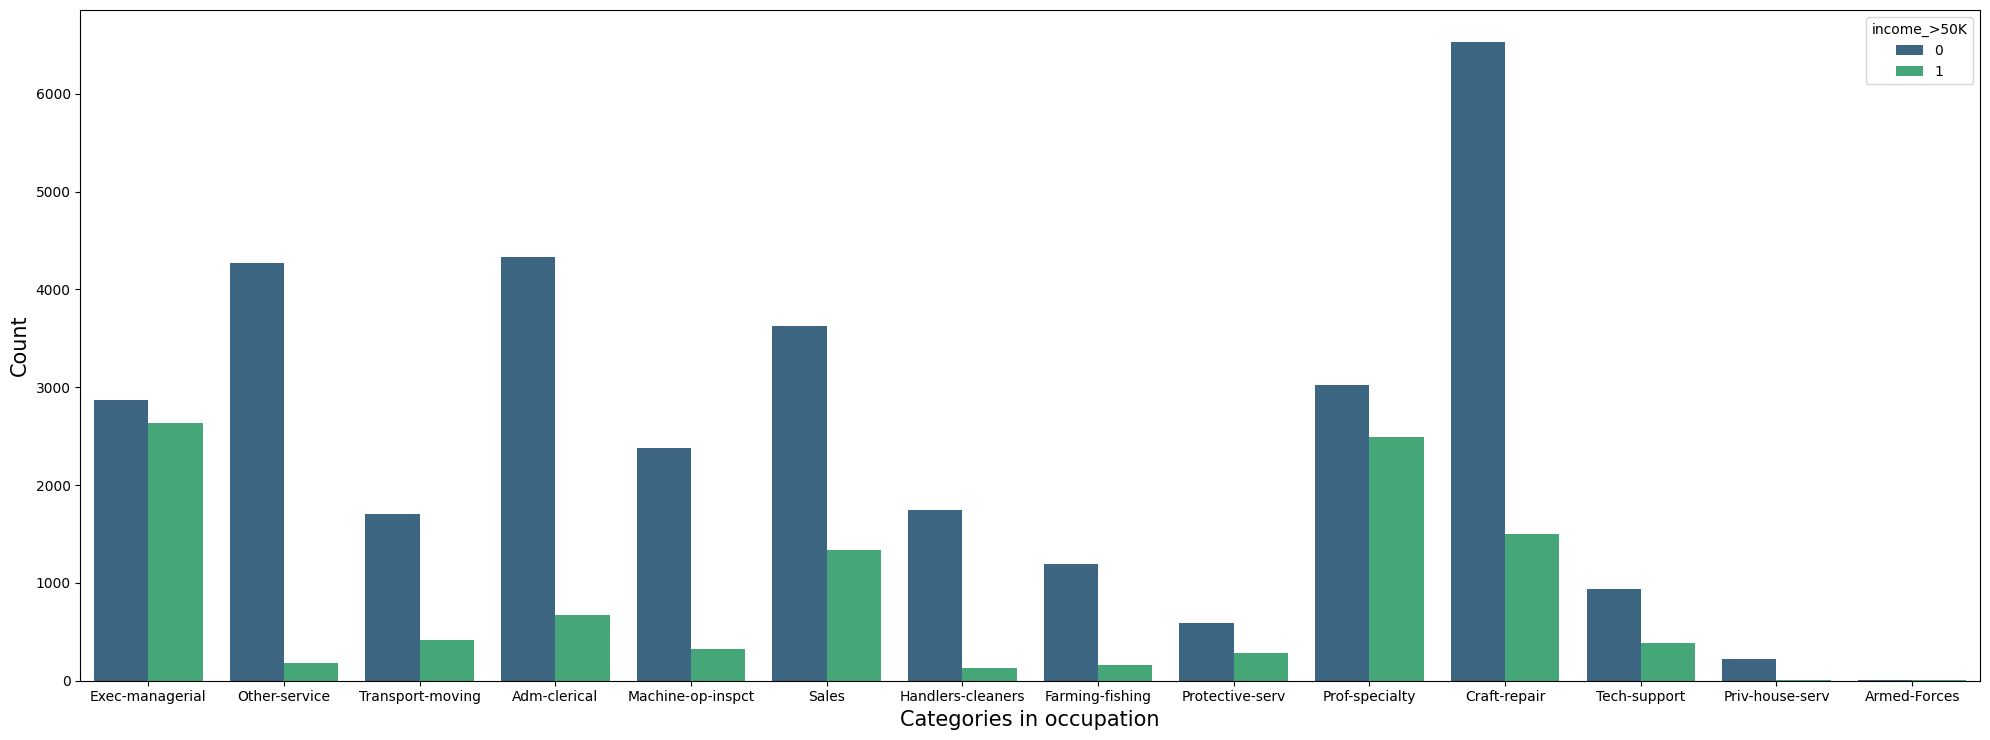

In [ ]:
sns.countplot(x=df['occupation'],data=df, hue='income_>50K', palette= 'viridis')
plt.rcParams["figure.figsize"] = [25.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15)
plt.xlabel("Categories in occupation", size=15);

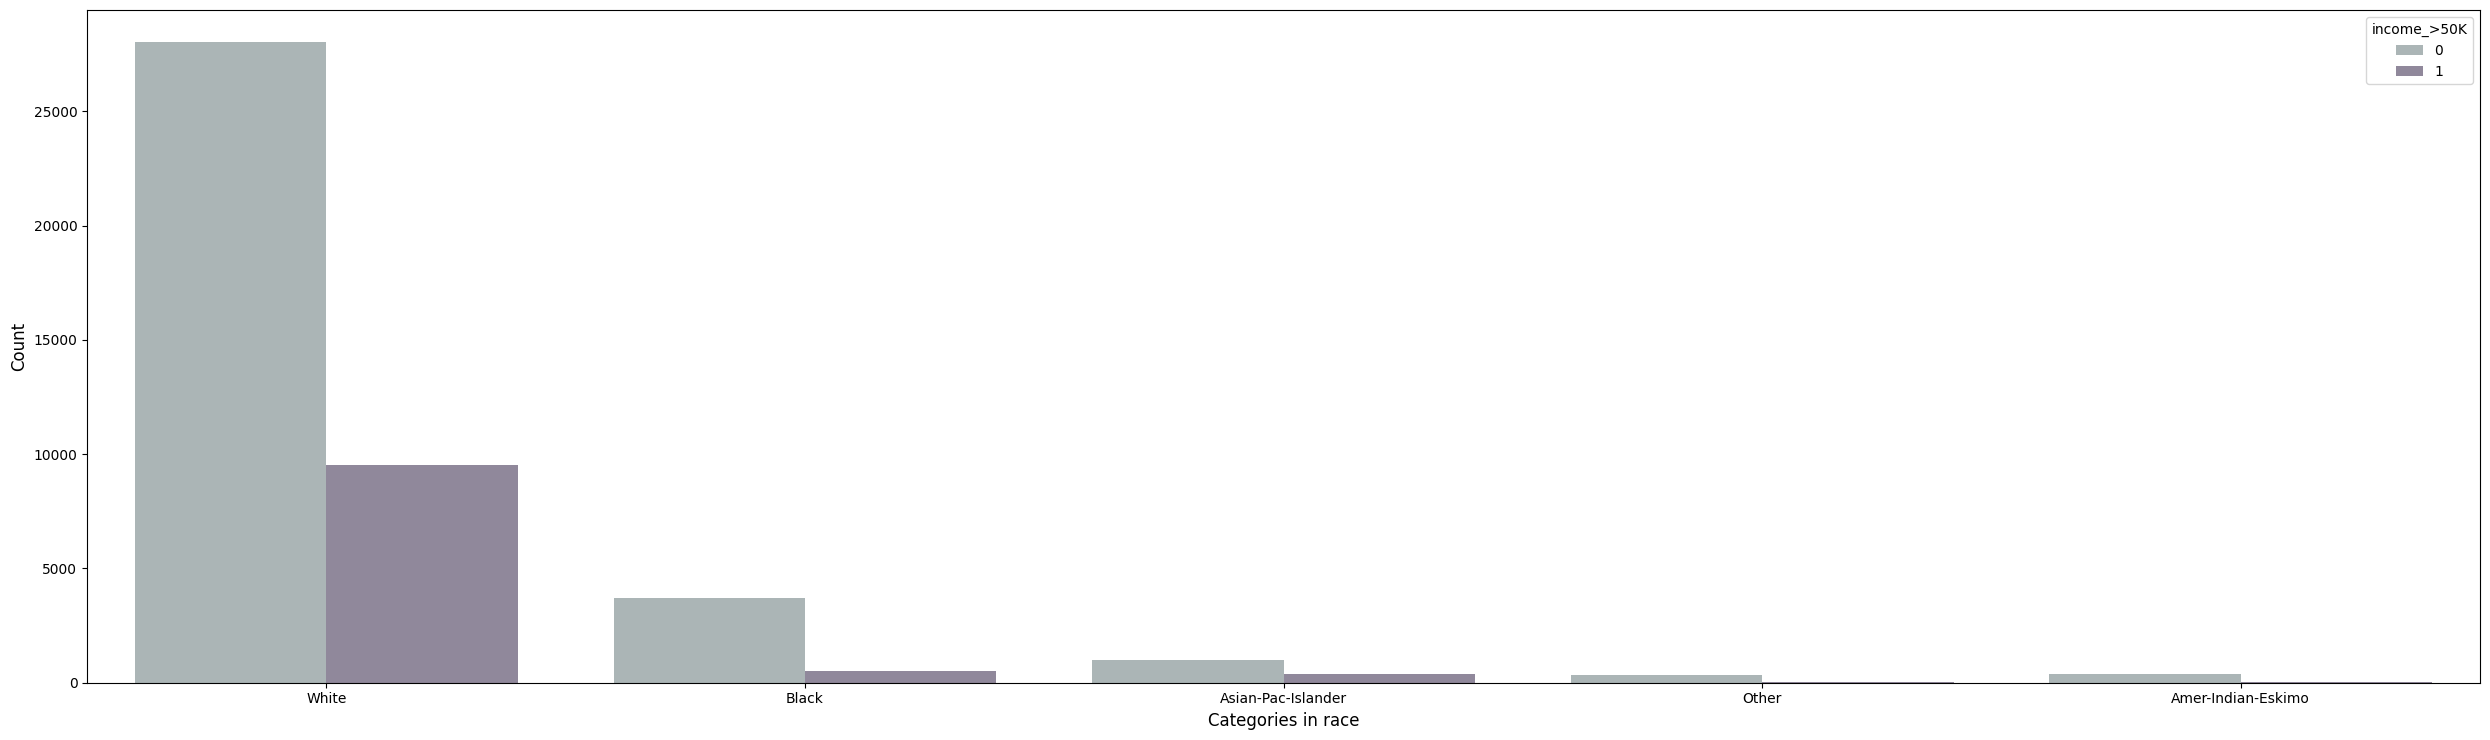

In [ ]:
sns.countplot(x=df['race'],data=df, hue='income_>50K', palette= 'Accent_d')
plt.ylabel("Count", size=12)
plt.xlabel("Categories in race", size=12);

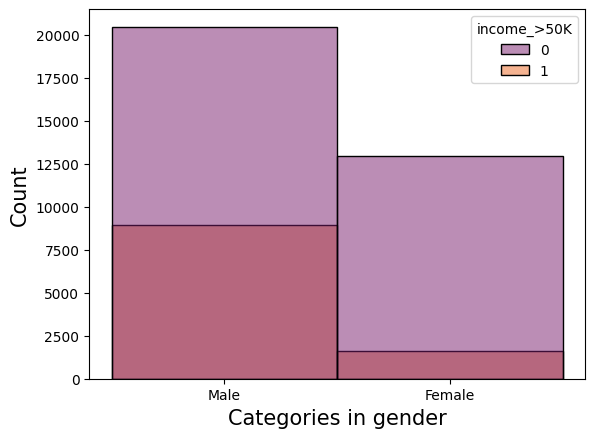

In [ ]:
sns.histplot(x=df['gender'],data=df, hue='income_>50K', palette= 'inferno')
plt.ylabel("Count", size=15)
plt.xlabel("Categories in gender", size=15);


In [ ]:
aux = df.copy(deep=True)
aux.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country  income_>50K  
0              60  United-States            1  
1              15  United-States            0  
2              40  United-States            1  
3              40  United-States            0  
4              40  United-States            0

In [ ]:
wrk_govt = [ 'State-gov','Federal-gov','Local-gov']
wrk_unemployed =['nan', 'Never-worked', 'Without-pay']
wrk_self = ['Self-emp-not-inc','Self-emp-inc']
for wrk in wrk_govt:
    aux['workclass'] = aux['workclass'].replace({wrk:'govt'})
for wrk in wrk_unemployed:
    aux['workclass'] = aux['workclass'].replace({wrk:'unemployed'})
for wrk in wrk_self:
    aux['workclass'] = aux['workclass'].replace({wrk:'self-emp'})

In [ ]:
edu_hs = ['1st-4th', '5th-6th','7th-8th', '9th', '10th', '11th','12th','HS-grad']
edu_ass= ['Assoc-voc','Assoc-acdm','Some-college','Prof-school']

for edu in edu_hs :
    aux['education']=aux['education'].replace({edu:'High-school'})
for edu in edu_ass:
    aux.education = aux.education.replace({edu:'Association'})

In [ ]:
mar_single = ['Separated','Widowed','Married-spouse-absent']
mar_marriage =['Married-civ-spouse','Married-AF-spouse']

for mar in mar_single:
    aux['marital-status'] =  aux['marital-status'].replace({mar:'Single'})
for mar in mar_marriage:
    aux['marital-status'] =  aux['marital-status'].replace({mar:'Married'})

In [ ]:
rel_mar = ['Husband', 'Wife']

for rel in rel_mar:
    aux.relationship = aux.relationship.replace({rel:'Married'})

In [ ]:
c_nna = ['United-States','Mexico','Dominican-Republic','Puerto-Rico','Cuba','El-Salvador','Canada','Guatemala','Haiti','Nicaragua','Honduras','Jamaica','Outlying-US(Guam-USVI-etc)']
c_sa= ['Ecuador','Columbia','Peru','Trinadad&Tobago','South']
c_asia= ['Japan','Philippines','China','Vietnam','Thailand','India','Cambodia','Iran','Taiwan','Laos','Hong']
c_europe = ['Portugal','Italy','England','Germany','Yugoslavia','Poland','Greece', 'Ireland','Scotland','France','Hungary','Holand-Netherlands']

for c in c_nna:
    aux['native-country'] = aux['native-country'].replace({c:'Central and North America'})
for c in c_sa:
    aux['native-country'] = aux['native-country'].replace({c:'South America'})
for c in c_asia:
    aux['native-country']=aux['native-country'].replace({c:'Asia'})
for c in c_europe:
    aux['native-country'] = aux['native-country'].replace({c:'Europe'})


In [ ]:
cat_features = [col for col in list(aux.columns) if aux[col].dtypes==object]
cat_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [ ]:
num_features = [col for col in list(aux.columns) if aux[col].dtypes!=object and col!='income_>50K']
num_features

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [ ]:
d = LabelEncoder()

for col in aux[cat_features]:
    aux[col]= d.fit_transform(aux[col])
aux.head()

age  workclass  fnlwgt  education  educational-num  marital-status  \
0   67          0  366425          2               16               0   
1   17          0  244602          3                8               2   
2   31          0  174201          1               13               1   
3   58          1  110199          3                4               1   
4   25          1  149248          0               10               2   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           3             1     4       1         99999             0   
1           7             3     4       1             0             0   
2           3             0     4       1             0             0   
3          13             0     4       1             0             0   
4           7             1     2       1             0             0   

   hours-per-week  native-country  income_>50K  
0              60               1            1  
1              15               1            0  
2              40               1            1  
3              40               1            0  
4              40               1            0

In [ ]:
corr_matrix=aux.corr()

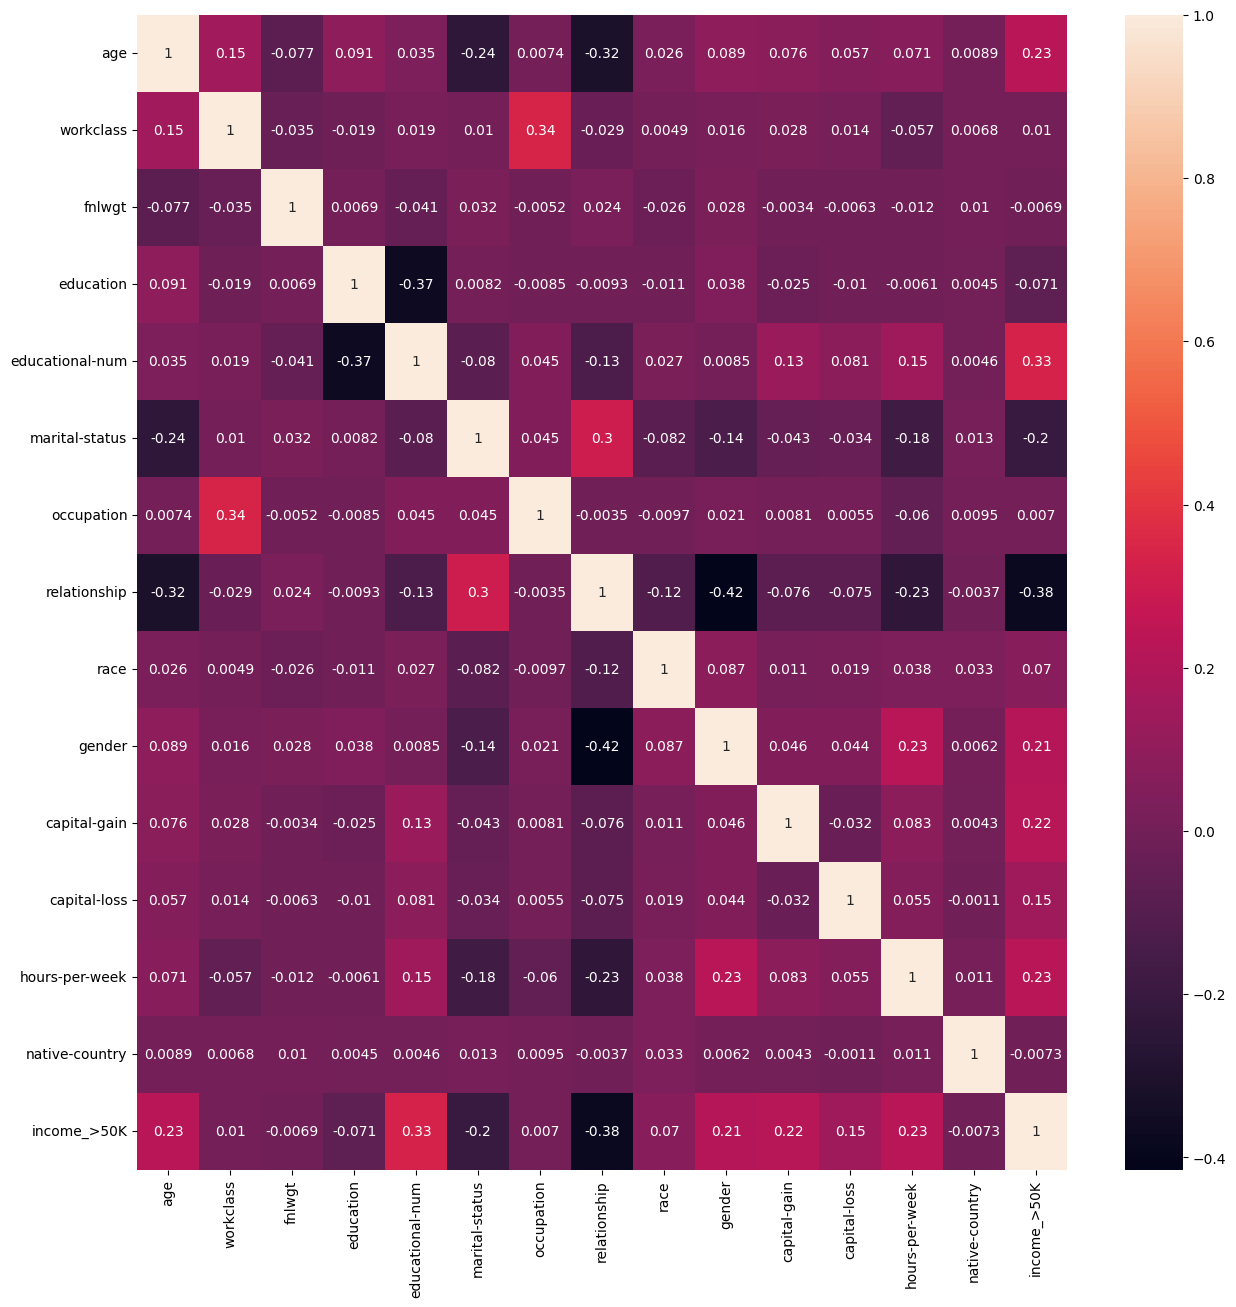

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame
description = aux.describe()

# Display the descriptive statistics
print(description)

                age     workclass        fnlwgt     education  \
count  43957.000000  43957.000000  4.395700e+04  43957.000000   
mean      38.617149      0.361945  1.896730e+05      1.774302   
std       13.734401      0.679301  1.058215e+05      1.434196   
min       17.000000      0.000000  1.349200e+04      0.000000   
25%       28.000000      0.000000  1.174960e+05      0.000000   
50%       37.000000      0.000000  1.781000e+05      3.000000   
75%       48.000000      0.000000  2.376710e+05      3.000000   
max       90.000000      3.000000  1.490400e+06      5.000000   

       educational-num  marital-status    occupation  relationship  \
count     43957.000000    43957.000000  43957.000000  43957.000000   
mean         10.074118        1.344246      5.755784      1.204655   
std           2.575092        0.804580      4.012434      1.415877   
min           1.000000        0.000000      0.000000      0.000000   
25%           9.000000        1.000000      2.000000      0.0000

In [ ]:
scaler = MinMaxScaler()
aux[num_features] = scaler.fit_transform(aux[num_features])
aux.head()

age  workclass    fnlwgt  education  educational-num  marital-status  \
0  0.684932          0  0.238967          2         1.000000               0   
1  0.000000          0  0.156482          3         0.466667               2   
2  0.191781          0  0.108814          1         0.800000               1   
3  0.561644          1  0.065479          3         0.200000               1   
4  0.109589          1  0.091919          0         0.600000               2   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           3             1     4       1           1.0           0.0   
1           7             3     4       1           0.0           0.0   
2           3             0     4       1           0.0           0.0   
3          13             0     4       1           0.0           0.0   
4           7             1     2       1           0.0           0.0   

   hours-per-week  native-country  income_>50K  
0        0.602041               1            1  
1        0.142857               1            0  
2        0.397959               1            1  
3        0.397959               1            0  
4        0.397959               1            0

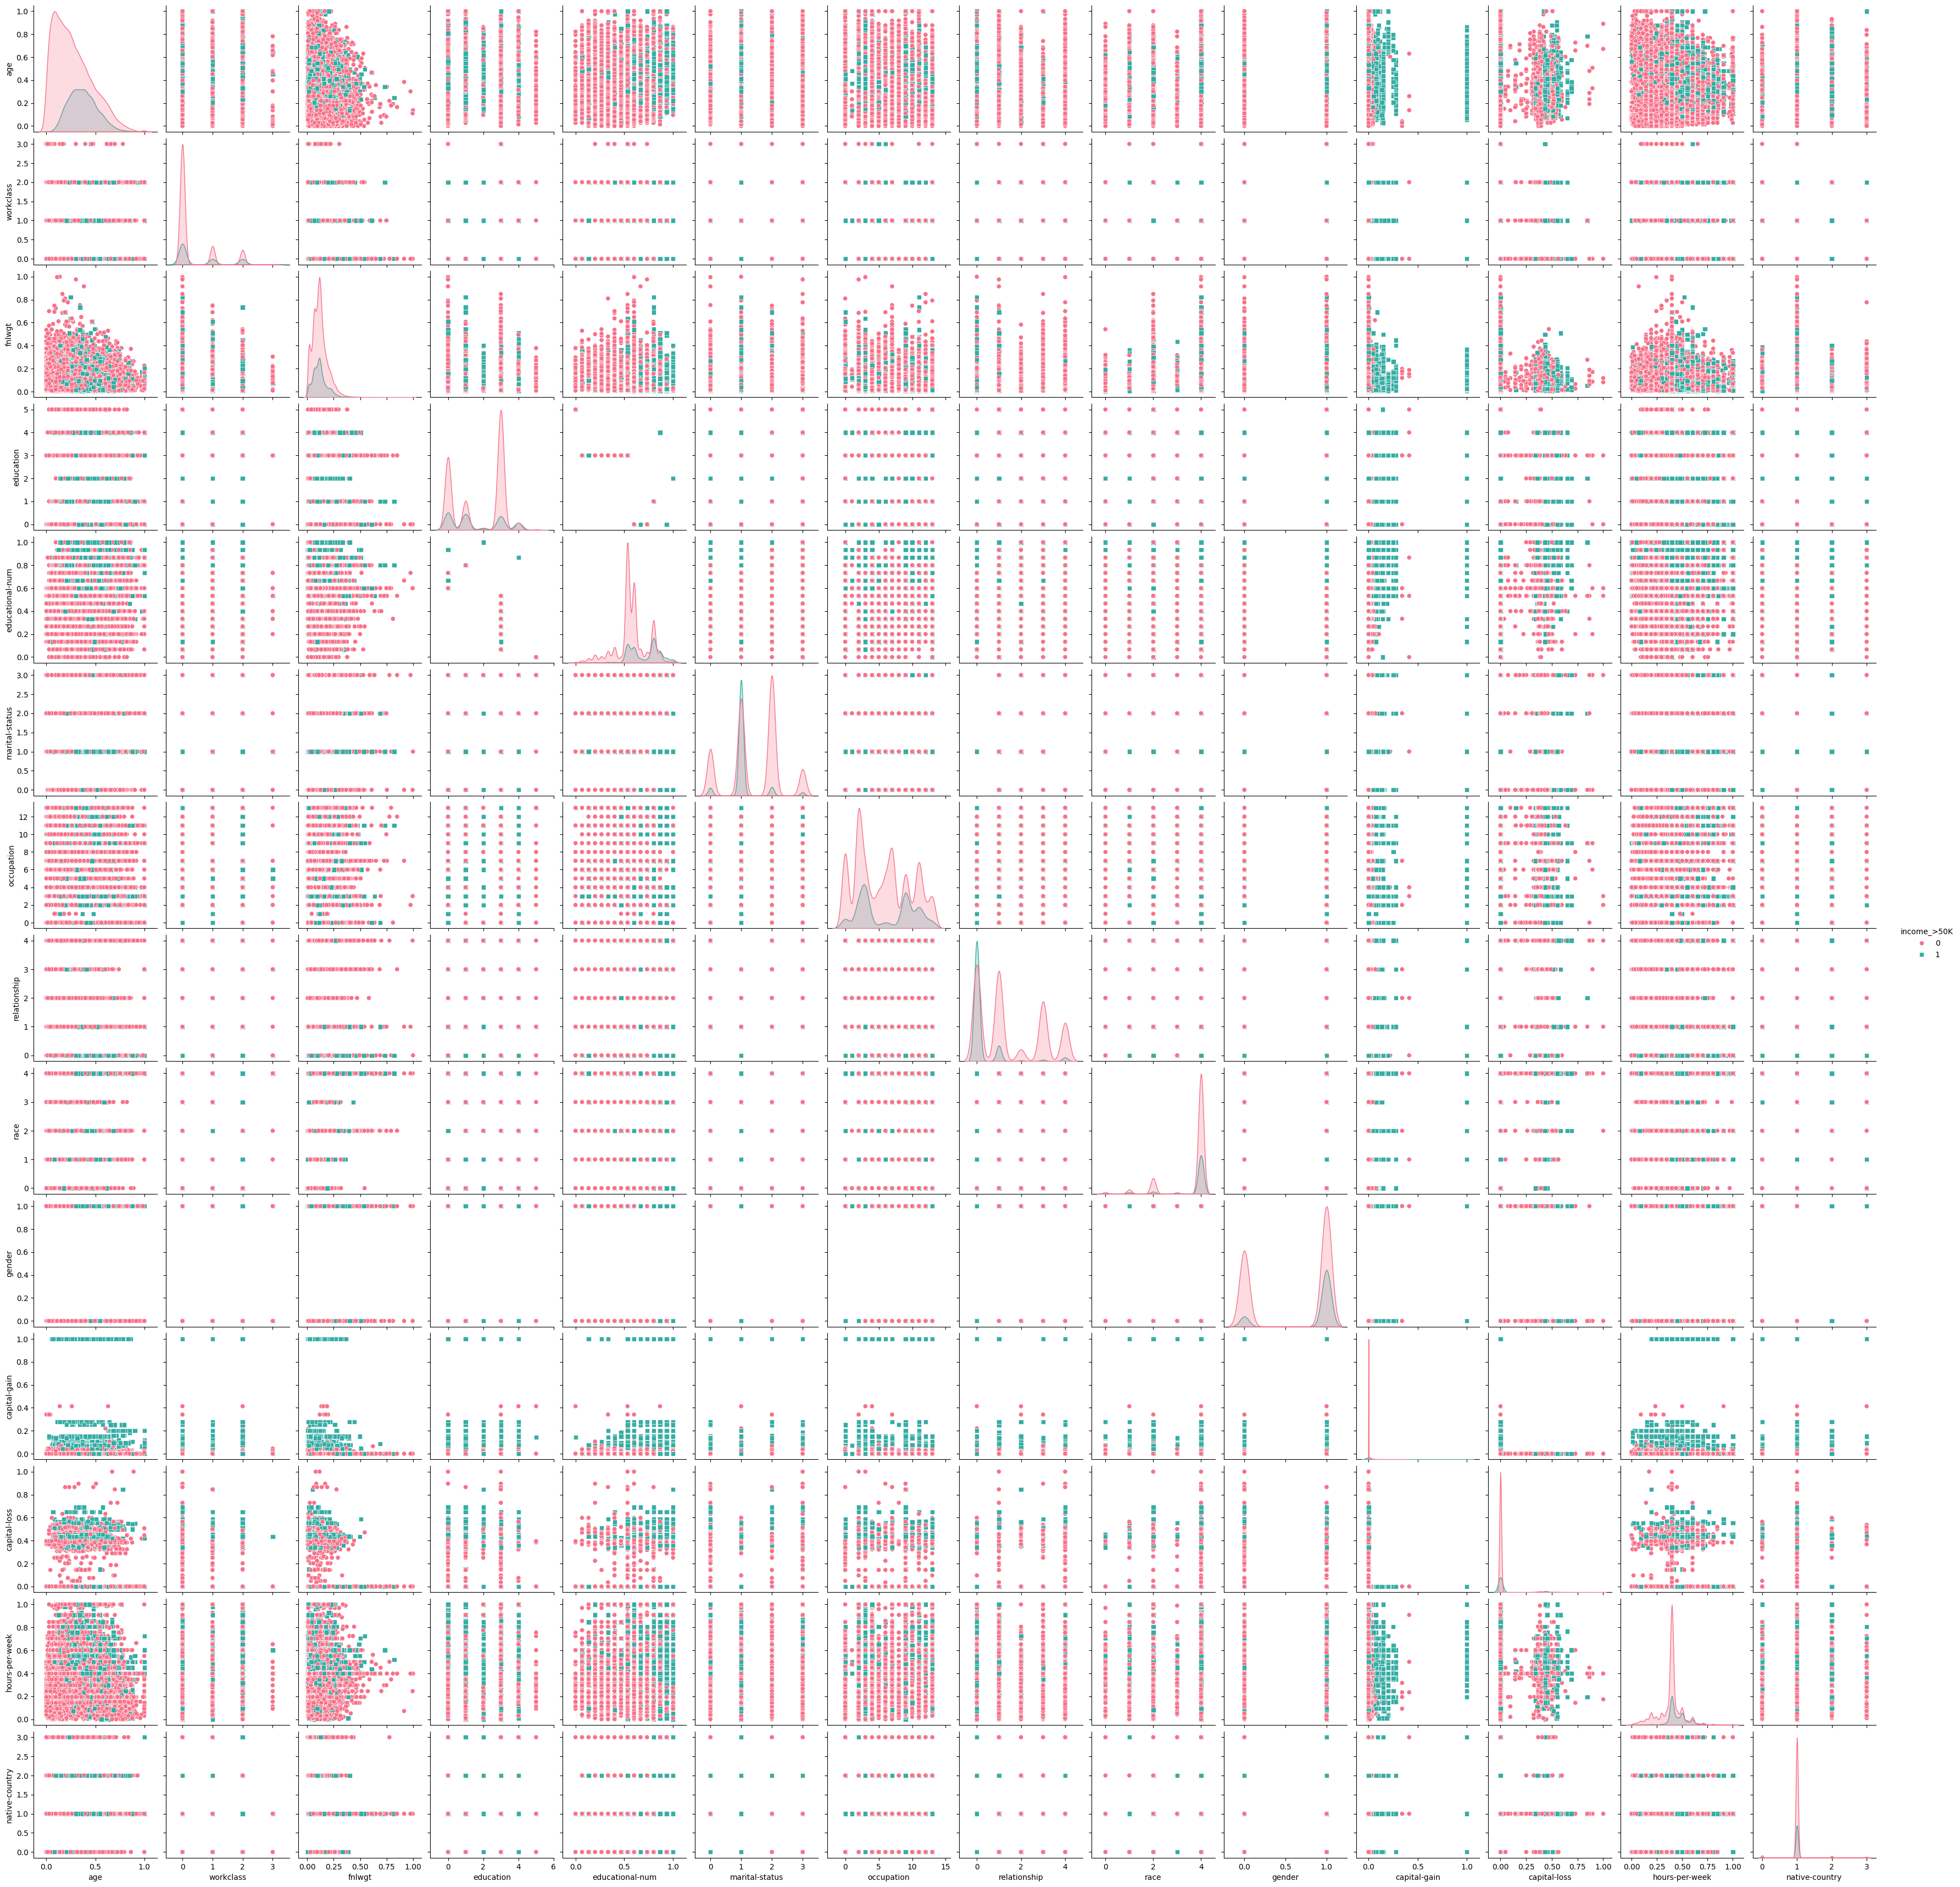

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is named 'df'
# Replace 'df' with your actual variable name if it's different
# You can load your data using pd.read_csv or another suitable method

# Example:
# df = pd.read_csv('your_dataset.csv')

# Create a pair plot
sns.pairplot(aux, hue='income_>50K', markers=['o', 's'], palette='husl')
plt.show()


In [ ]:
X = aux.drop("income_>50K",axis=1)
y = aux['income_>50K']

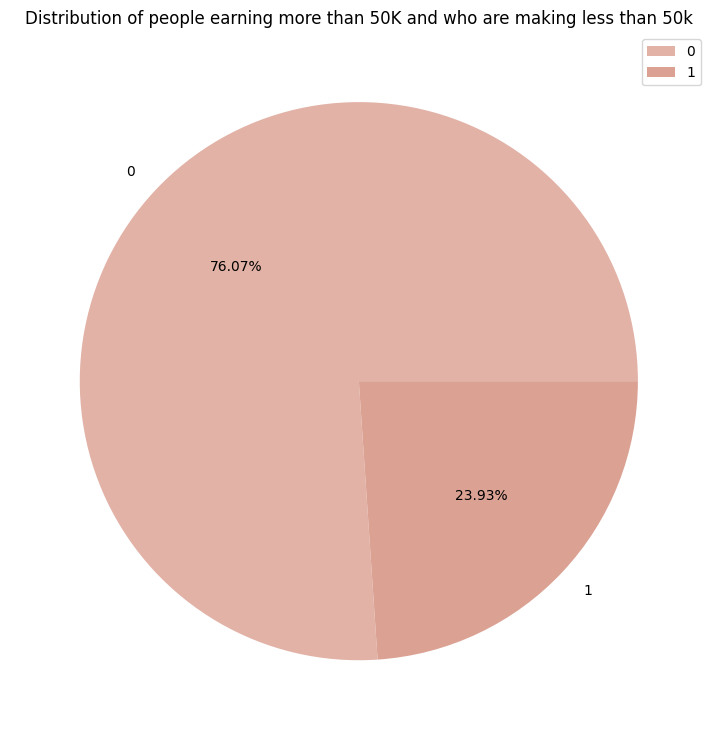

In [ ]:
how = pd.DataFrame(aux['income_>50K'].value_counts(normalize=True)*100)
color = ['#e2b2a7', '#dba294']
plt.pie(how['income_>50K'], labels=how.index,  autopct= '%2.2f%%', colors=color)
plt.legend(how.index)
plt.title('Distribution of people earning more than 50K and who are making less than 50k')
plt.show()

Resampled dataset shape Counter({1: 33439, 0: 33439})


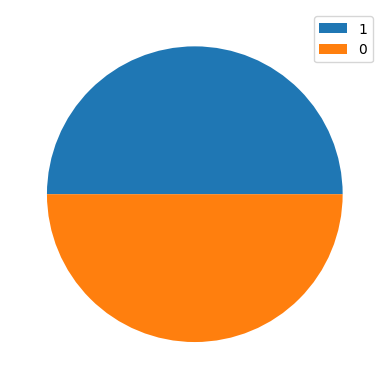

In [ ]:
fig = plt.subplots()
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)
from collections import Counter
print('Resampled dataset shape %s' % Counter(y))
plt.pie(y.value_counts(normalize=True))
plt.legend(y.value_counts().index);

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate random indices for the test set
test_indices = np.random.choice(X.index, size=int(0.3 * len(X)), replace=False)

# Create the training and testing sets
X_train = X.drop(test_indices)
y_train = y.drop(test_indices)
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]

# Check the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (46815, 14)
X_test shape: (20063, 14)
y_train shape: (46815,)
y_test shape: (20063,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Create and train the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# True Positive, False Positive, True Negative, False Negative
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# AUC-ROC Curve
y_proba = knn.predict_proba(X_test)[:, 1]  # Assuming binary classification
roc_auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC Score: {roc_auc:.4f}')


Accuracy: 0.9030

Confusion Matrix:
[[8586 1471]
 [ 475 9531]]
Precision: 0.8663
Recall: 0.9525
AUC-ROC Score: 0.9031


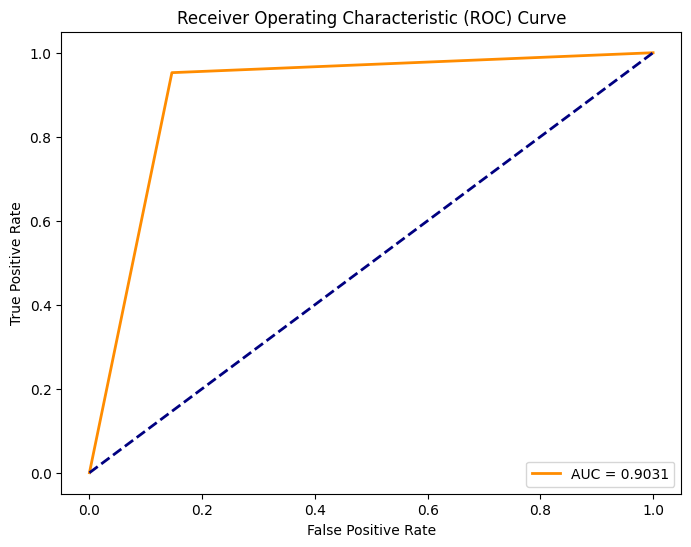

In [ ]:
# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np

class KNeighborsClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train.to_numpy()
        self.y_train = y_train.to_numpy()

    def predict(self, X_test):
        y_pred = []
        X_test=X_test.to_numpy()
        for sample in X_test:
            distances = np.linalg.norm(self.X_train - sample, axis=1)
            nearest_neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_neighbors_labels = self.y_train[nearest_neighbors_indices]
            unique_labels, counts = np.unique(nearest_neighbors_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            y_pred.append(predicted_label)
        return np.array(y_pred)

def accuracy_score(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy

def precision_recall_f1(y_true, y_pred, label):
    true_positive = np.sum((y_true == label) & (y_pred == label))
    false_positive = np.sum((y_true != label) & (y_pred == label))
    false_negative = np.sum((y_true == label) & (y_pred != label))

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return precision, recall, f1

def classification_report(y_true, y_pred):
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    report = ""
    for label in unique_labels:
        precision, recall, f1 = precision_recall_f1(y_true, y_pred, label)
        report += f'Class {label}:\n'
        report += f'  Precision: {precision:.4f}\n'
        report += f'  Recall: {recall:.4f}\n'
        report += f'  F1-score: {f1:.4f}\n\n'
    return report

def confusion_matrix(y_true, y_pred):
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)
    label_to_index = {label: i for i, label in enumerate(unique_labels)}

    for true_label, pred_label in zip(y_true, y_pred):
        true_index = label_to_index[true_label]
        pred_index = label_to_index[pred_label]
        matrix[true_index, pred_index] += 1

    return matrix



knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9031

Classification Report:
Class 0:
  Precision: 0.9476
  Recall: 0.8538
  F1-score: 0.8983

Class 1:
  Precision: 0.8664
  Recall: 0.9525
  F1-score: 0.9074



Confusion Matrix:
[[8587 1470]
 [ 475 9531]]
